In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Fare Olayları

In [ ]:
# pencereyi kapama

def draw_circle(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img, (x, y), 100, (0, 255, 0), -1)
    elif event == cv2.EVENT_RBUTTONDOWN:
        cv2.circle(img, (x, y), 100, (255, 0, 0), -1)

cv2.namedWindow(winname='draw')

cv2.setMouseCallback('draw', draw_circle)

img = np.zeros((512, 512, 3), dtype=np.int8)

## ** gri tuval çünkü np.int8'in değer aralığı -128 ... 127.. arasındadır, dolayısıyla 0'dan başlayan herhangi bir değer +127 olacaktır.
# [-128,127], [0,255] ile eşlenir
# uint8 = 0..255
while True:
    cv2.imshow('draw', img)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()
plt.imshow(img)

# rengin plt ve cv2 tarafından yorumlanmasının rgb ve bgr'den nasıl farklı olduğuna dikkat edin

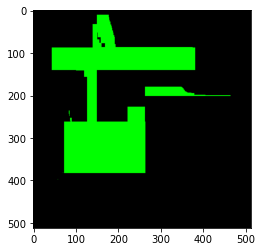

In [ ]:
drawing = False
ix, iy = -1, -1
jx, jy = 0, 0

def draw_rectangle(event, x, y, flags, param):
    global ix, iy, jy, jx, drawing
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y
        jx, jy = x, y
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:

            if x<jx or y<jy:
                cv2.rectangle(img, (ix, iy), (jx, jy), (0, 0, 0), -1)
            cv2.rectangle(img, (ix, iy), (x, y), (0, 255, 0), -1)
            jx, jy = x, y
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False

        cv2.rectangle(img, (ix, iy), (x, y), (0, 255, 0), -1)



cv2.namedWindow(winname='draw')

cv2.setMouseCallback('draw', draw_rectangle)

img = np.zeros((512, 512, 3), dtype=np.uint8)

## ** gri tuval çünkü np.int8'in değer aralığı -128 ... 127.. arasındadır, dolayısıyla 0'dan başlayan herhangi bir değer +127 olacaktır.
# [-128,127], [0,255] ile eşlendi
# uint8 = 0..255
while True:
    cv2.imshow('draw', img)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()
plt.imshow(img)

## İzleme çubuğu

In [ ]:
maxScaleUp = 100
scaleFactor = 1
windowName = "Görüntüyü yeniden boyutlandırmak"
trackbarValue = "Ölçek"

# resmi oku
img = cv2.imread("/content/lena_std.tif")

# Sonuçları görüntülemek için bir pencere oluşturun ve bayrağı Otomatik Boyutlandır olarak ayarlayın
cv2.namedWindow(windowName, cv2.WINDOW_AUTOSIZE)

scaled_img = img

# Geri arama işlevleri
def scaleImage(*args):
    global scaled_img
    # İzleme çubuğundan ölçek faktörünü alın
    scaleFactor = 1+ args[0]/100.0
    # Resmi yeniden boyutlandır
    scaled_img = cv2.resize(img, None, fx=scaleFactor, fy = scaleFactor, interpolation = cv2.INTER_LINEAR)
    cv2.imshow(windowName, scaled_img)

# İzleme çubuğu oluşturun ve bir geri arama işlevini ilişkilendirin
cv2.createTrackbar(trackbarValue, windowName, scaleFactor, maxScaleUp, scaleImage)

# Resmi göster
cv2.imshow(windowName, img)

c = cv2.waitKey(0)
cv2.destroyAllWindows()
scaled_img_rgb = cv2.cvtColor(scaled_img, cv2.COLOR_BGR2RGB)
plt.imshow(scaled_img_rgb)